In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import gzip
import yfinance as yf

from urllib.request import urlopen
from xmltodict import parse
from zipfile import ZipFile
from io import BytesIO

In [3]:
with urlopen('https://api.worldbank.org/v2/en/indicator/SE.ADT.LITR.ZS?downloadformat=xml') as url:
    zfile = ZipFile(BytesIO(url.read()))
    print(zfile.filelist)
    data = parse(zfile.open('API_SE.ADT.LITR.ZS_DS2_en_xml_v2_4499617.xml').read())
data_literacy = [{x['@name']: x['#text'] for x in y['field'] if '#text' in x.keys()} for y in data['Root']['data']['record']]
df_literacy = pd.DataFrame(data_literacy).dropna()

[<ZipInfo filename='API_SE.ADT.LITR.ZS_DS2_en_xml_v2_4499617.xml' compress_type=deflate file_size=4686158 compress_size=104366>]


In [4]:
with urlopen('https://api.worldbank.org/v2/en/indicator/SH.DYN.MORT?downloadformat=xml') as url:
    zfile = ZipFile(BytesIO(url.read()))
    print(zfile.filelist)
    data = parse(zfile.open('API_SH.DYN.MORT_DS2_en_xml_v2_4639508.xml').read())
data_child = [{x['@name']: x['#text'] for x in y['field'] if '#text' in x.keys()} for y in data['Root']['data']['record']]
df_child = pd.DataFrame(data_child).dropna()

[<ZipInfo filename='API_SH.DYN.MORT_DS2_en_xml_v2_4639508.xml' compress_type=deflate file_size=4533211 compress_size=119924>]


In [5]:
with urlopen('https://api.worldbank.org/v2/en/indicator/SI.POV.GINI?downloadformat=xml') as url:
    zfile = ZipFile(BytesIO(url.read()))
    print(zfile.filelist)
    data = parse(zfile.open('API_SI.POV.GINI_DS2_en_xml_v2_4639705.xml').read())
data_gini = [{x['@name']: x['#text'] for x in y['field'] if '#text' in x.keys()} for y in data['Root']['data']['record']]
df_gini = pd.DataFrame(data_gini).dropna()

[<ZipInfo filename='API_SI.POV.GINI_DS2_en_xml_v2_4639705.xml' compress_type=deflate file_size=3806005 compress_size=72157>]


In [6]:
def func(name, dataframe):
    var1 = dataframe[dataframe["Country or Area"] == name]
    var1 = var1.dropna()
    var1['Year'] = var1['Year'].astype('int64')
    var1['Value'] = var1['Value'].astype('float32')
    plt.plot(var1.Year, var1.Value)
    plt.tight_layout()
    plt.xlabel('Years')
    plt.tight_layout()
    if name == "Turkiye":
        plt.legend(['Turkiye'])
    else:
        plt.legend(["Greece", "Bulgaria", "Poland", "Syrian Arab Republic", "Romania", "Iran, Islamic Rep."])

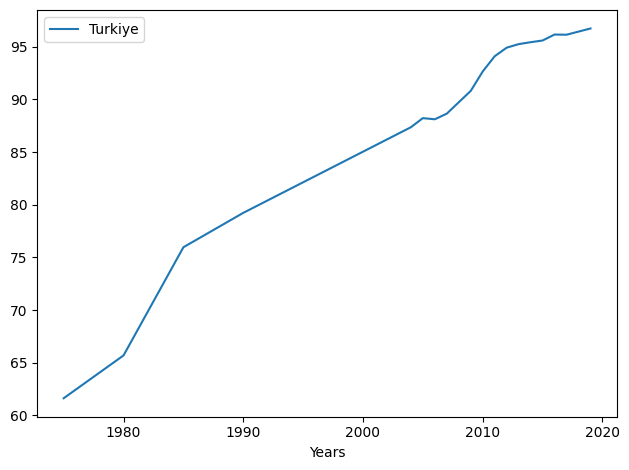

In [7]:
func("Turkiye", df_literacy);

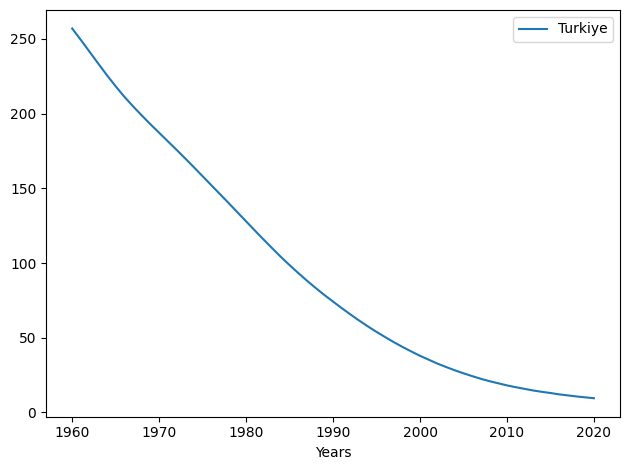

In [8]:
func("Turkiye", df_child)

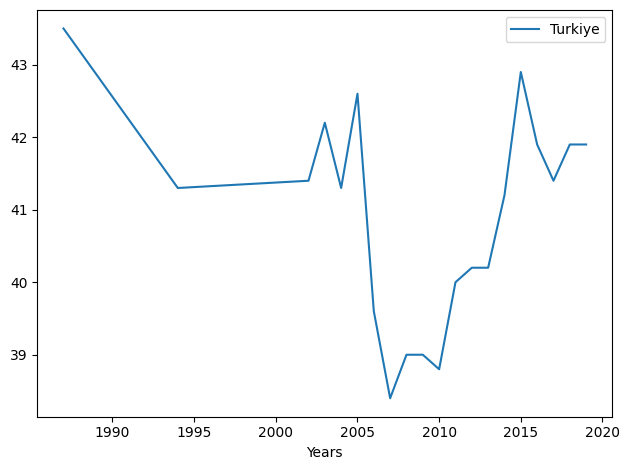

In [9]:
func("Turkiye", df_gini)

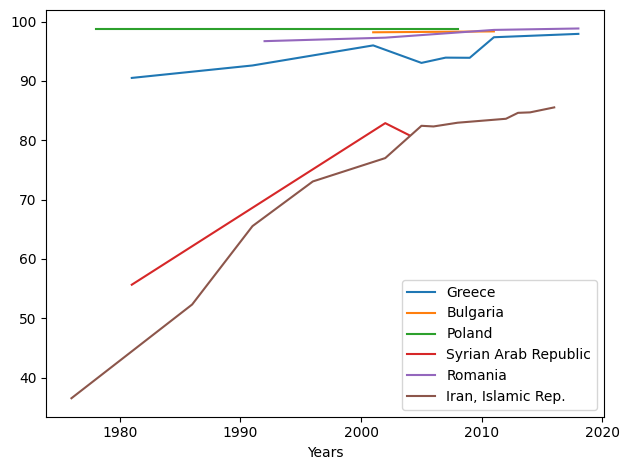

In [10]:
countries = ["Greece", "Bulgaria", "Poland", "Syrian Arab Republic", "Romania", "Iran, Islamic Rep."]
for i in range(len(countries)):
    func(countries[i], df_literacy)

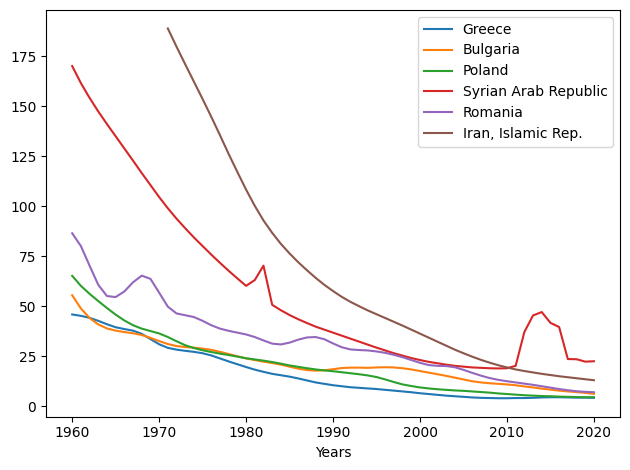

In [11]:
countries = ["Greece", "Bulgaria", "Poland", "Syrian Arab Republic", "Romania", "Iran, Islamic Rep."]
for i in range(len(countries)):
    func(countries[i], df_child)

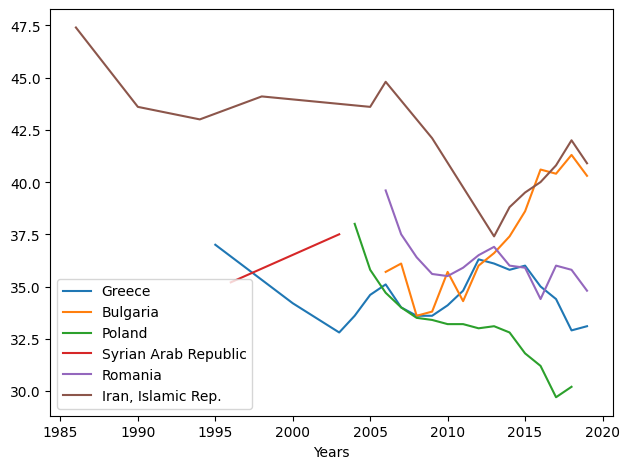

In [12]:
countries = ["Greece", "Bulgaria", "Poland", "Syrian Arab Republic", "Romania", "Iran, Islamic Rep."]
for i in range(len(countries)):
    func(countries[i], df_gini)

In [13]:
literacy_Tur = df_literacy[df_literacy["Country or Area"] =="Turkiye"].dropna()
literacy_Tur['Year'] = literacy_Tur['Year'].astype("float32")
literacy_Tur['Value'] = literacy_Tur['Value'].astype("float32")

child_Tur = df_child[df_child["Country or Area"] =="Turkiye"].dropna()
child_Tur['Year'] = child_Tur['Year'].astype("float32")
child_Tur['Value'] = child_Tur['Value'].astype("float32")

gini_Tur = df_gini[df_gini["Country or Area"] =="Turkiye"].dropna() 
gini_Tur['Year'] = gini_Tur['Year'].astype("float32")
gini_Tur['Value'] = gini_Tur['Value'].astype("float32")


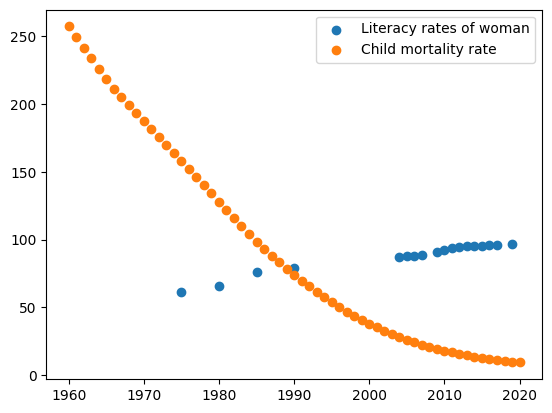

In [14]:
plt.scatter(literacy_Tur.Year,literacy_Tur.Value, label='Literacy rates of woman')
plt.scatter(child_Tur.Year,child_Tur.Value, label='Child mortality rate')
plt.legend()
plt.show()

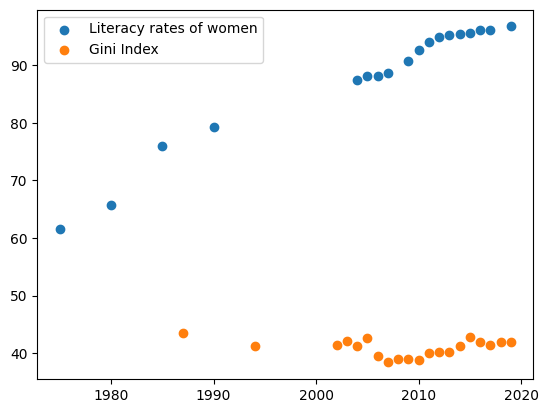

In [15]:
plt.scatter(literacy_Tur.Year,literacy_Tur.Value, label='Literacy rates of women')
plt.scatter(gini_Tur.Year,gini_Tur.Value, label='Gini Index')
plt.legend()
plt.show()

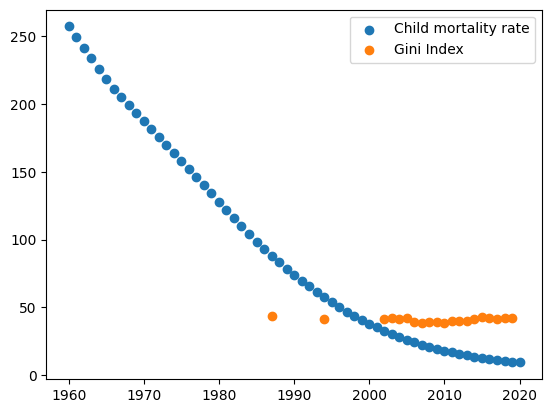

In [16]:
plt.scatter(child_Tur.Year,child_Tur.Value, label='Child mortality rate')
plt.scatter(gini_Tur.Year,gini_Tur.Value, label='Gini Index')
plt.legend()
plt.show()

# QUESTION 2

In [72]:
with urlopen('https://data.ibb.gov.tr/datastore/dump/7aec630d-2757-4da0-97f1-71b140abd818?bom=True') as file:
    squirrel = pd.read_csv(file)
    data =  pd.DataFrame(squirrel).dropna()
data.head()

,_id,PASSAGE_COUNT,PASSENGER_COUNT,transaction_Month,transaction_Year,GENDER,LINE,STATION_NAME,STATION_NUMBER,TOWN,LATITUDE,LONGITUDE,age_group
0,1,24918,10204,1,2019,1,AKSARAY-HAVALİMANI,AKSARAY,AKE-AKS,Fatih,41.011833,28.947889,60+
1,2,5584,2808,1,2019,2,AKSARAY-HAVALİMANI,AKSARAY,AKE-AKS,Fatih,41.011833,28.947889,60+
2,3,21688,8198,1,2019,1,AKSARAY-HAVALİMANI,AKSARAY 1,AKE-EMN,Fatih,41.011833,28.947889,30-60
3,4,5220,1967,1,2019,1,AKSARAY-HAVALİMANI,AKSARAY 1,AKE-EMN,Fatih,41.011833,28.947889,<20
4,5,3161,1589,1,2019,2,AKSARAY-HAVALİMANI,AKSARAY 1,AKE-EMN,Fatih,41.011833,28.947889,60+


### Question 2.1
The first the number of the passage.
The second is the number of the passengers.
The fourth column is the information about months.
The fifth column is the information about years.
The sixth column is the information of line.
The seventh column is the information of station name.
The eighth column is the information of number of station
The nineth column is the information about town.
The tenth and eleventh columns are the information of the latitude and longitude
The twelfth column is about age group.

# QUESTION 3

In [18]:
data = yf.download("MSFT AAPL NDX", start="2000-01-01")
data

[*********************100%***********************]  3 of 3 completed


Adj Close                                 Close  \
                                 AAPL        MSFT           NDX        AAPL   
Date                                                                          
2000-01-03 00:00:00-05:00    0.853356   36.555363   3790.550049    0.999442   
2000-01-04 00:00:00-05:00    0.781409   35.320526   3546.199951    0.915179   
2000-01-05 00:00:00-05:00    0.792844   35.692944   3507.310059    0.928571   
2000-01-06 00:00:00-05:00    0.724232   34.497299   3340.810059    0.848214   
2000-01-07 00:00:00-05:00    0.758538   34.948120   3529.600098    0.888393   
...                               ...         ...           ...         ...   
2022-10-04 00:00:00-04:00  146.100006  248.880005  11582.540039  146.100006   
2022-10-05 00:00:00-04:00  146.399994  249.199997  11573.179688  146.399994   
2022-10-06 00:00:00-04:00  145.429993  246.789993  11485.500000  145.429993   
2022-10-07 00:00:00-04:00  140.089996  234.240005  11039.469727  140.089996   
2022-10-10 00:00:00-04:00  141.100006         NaN           NaN  141.100006   

                                                           High              \
                                 MSFT           NDX        AAPL        MSFT   
Date                                                                          
2000-01-03 00:00:00-05:00   58.281250   3790.550049    1.004464   59.312500   
2000-01-04 00:00:00-05:00   56.312500   3546.199951    0.987723   58.562500   
2000-01-05 00:00:00-05:00   56.906250   3507.310059    0.987165   58.187500   
2000-01-06 00:00:00-05:00   55.000000   3340.810059    0.955357   56.937500   
2000-01-07 00:00:00-05:00   55.718750   3529.600098    0.901786   56.125000   
...                               ...           ...         ...         ...   
2022-10-04 00:00:00-04:00  248.880005  11582.540039  146.220001  250.360001   
2022-10-05 00:00:00-04:00  249.199997  11573.179688  147.380005  250.580002   
2022-10-06 00:00:00-04:00  246.789993  11485.500000  147.539993  250.339996   
2022-10-07 00:00:00-04:00  234.240005  11039.469727  143.100006  241.320007   
2022-10-10 00:00:00-04:00         NaN           NaN  141.889999         NaN   

                                                Low                            \
                                    NDX        AAPL        MSFT           NDX   
Date                                                                            
2000-01-03 00:00:00-05:00   3836.860107    0.907924   56.000000   3643.250000   
2000-01-04 00:00:00-05:00   3766.570068    0.903460   56.125000   3542.729980   
2000-01-05 00:00:00-05:00   3576.169922    0.919643   54.687500   3371.750000   
2000-01-06 00:00:00-05:00   3513.550049    0.848214   54.187500   3334.020020   
2000-01-07 00:00:00-05:00   3529.750000    0.852679   53.656250   3314.750000   
...                                 ...         ...         ...           ...   
2022-10-04 00:00:00-04:00  11609.250000  144.259995  244.979996  11462.370117   
2022-10-05 00:00:00-04:00  11647.620117  143.009995  244.100006  11312.519531   
2022-10-06 00:00:00-04:00  11660.549805  145.220001  246.080002  11472.830078   
2022-10-07 00:00:00-04:00  11293.650391  139.449997  233.169998  10991.660156   
2022-10-10 00:00:00-04:00           NaN  138.572906         NaN           NaN   

                                 Open                               Volume  \
                                 AAPL        MSFT           NDX       AAPL   
Date                                                                         
2000-01-03 00:00:00-05:00    0.936384   58.687500   3755.739990  535796800   
2000-01-04 00:00:00-05:00    0.966518   56.781250   3766.570068  512377600   
2000-01-05 00:00:00-05:00    0.926339   55.562500   3543.129883  778321600   
2000-01-06 00:00:00-05:00    0.947545   56.093750   3488.310059  767972800   
2000-01-07 00:00:00-05:00    0.861607   54.312500   3337.260010  460734400   
...                               ...         ...      

In [31]:
aapl = yf.Ticker('aapl')
aapl_info = aapl.history(start="2000-01-01")
aapl_info['Log Values'] = np.log(aapl_info['Close'])
aapl_info['Log Return'] = np.log(aapl_info['Close']/aapl_info['Close'].shift(1))
aapl_info.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Log Values,Log Return
Date,,,,,,,,,
2000-01-03 00:00:00-05:00,0.799515,0.857643,0.775214,0.853355,535796800,0.0,0.0,-0.158579,NaN
2000-01-04 00:00:00-05:00,0.825244,0.843350,0.771403,0.781409,512377600,0.0,0.0,-0.246656,-0.088077
2000-01-05 00:00:00-05:00,0.790938,0.842873,0.785221,0.792844,778321600,0.0,0.0,-0.232129,0.014527
2000-01-06 00:00:00-05:00,0.809044,0.815714,0.724232,0.724232,767972800,0.0,0.0,-0.322643,-0.090514
2000-01-07 00:00:00-05:00,0.735667,0.769974,0.728044,0.758538,460734400,0.0,0.0,-0.276362,0.046281


In [32]:
ndx = yf.Ticker('ndx')
ndx_info = ndx.history(start="2000-01-01")
ndx_info['Log Values'] = np.log(ndx_info['Close'])
ndx_info['Log Return'] = np.log(ndx_info['Close']/ndx_info['Close'].shift(1))
ndx_info.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Log Values,Log Return
Date,,,,,,,,,
2000-01-03 00:00:00-05:00,3755.739990,3836.860107,3643.25000,3790.550049,1510070000,0,0,8.240266,NaN
2000-01-04 00:00:00-05:00,3766.570068,3766.570068,3542.72998,3546.199951,1511840000,0,0,8.173632,-0.066635
2000-01-05 00:00:00-05:00,3543.129883,3576.169922,3371.75000,3507.310059,1735670000,0,0,8.162605,-0.011027
2000-01-06 00:00:00-05:00,3488.310059,3513.550049,3334.02002,3340.810059,1598320000,0,0,8.113969,-0.048636
2000-01-07 00:00:00-05:00,3337.260010,3529.750000,3314.75000,3529.600098,1634930000,0,0,8.168940,0.054971


In [33]:
msft = yf.Ticker('msft')
msft_info = msft.history(start="2000-01-01")
msft_info['Log Values'] = np.log(msft_info['Close'])
msft_info['Log Return'] = np.log(msft_info['Close']/msft_info['Close'].shift(1))
msft_info.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Log Values,Log Return
Date,,,,,,,,,
2000-01-03 00:00:00-05:00,36.810184,37.202198,35.124520,36.555374,53228400,0.0,0.0,3.598828,NaN
2000-01-04 00:00:00-05:00,35.614560,36.731803,35.202945,35.320549,54119000,0.0,0.0,3.564465,-0.034363
2000-01-05 00:00:00-05:00,34.850101,36.496562,34.301280,35.692932,64059600,0.0,0.0,3.574953,0.010488
2000-01-06 00:00:00-05:00,35.183309,35.712529,33.987665,34.497284,54976600,0.0,0.0,3.540881,-0.034072
2000-01-07 00:00:00-05:00,34.066087,35.202930,33.654471,34.948120,62013600,0.0,0.0,3.553865,0.012984


In [ ]:
stock_history = pd.DataFrame()
stock_history = pd.concat([aapl_info, msft_info, ndx_info], keys=['Apple', 'Microsoft', 'NASDAQ'], axis=1)
stock_history.head()

<AxesSubplot: ylabel='Frequency'>

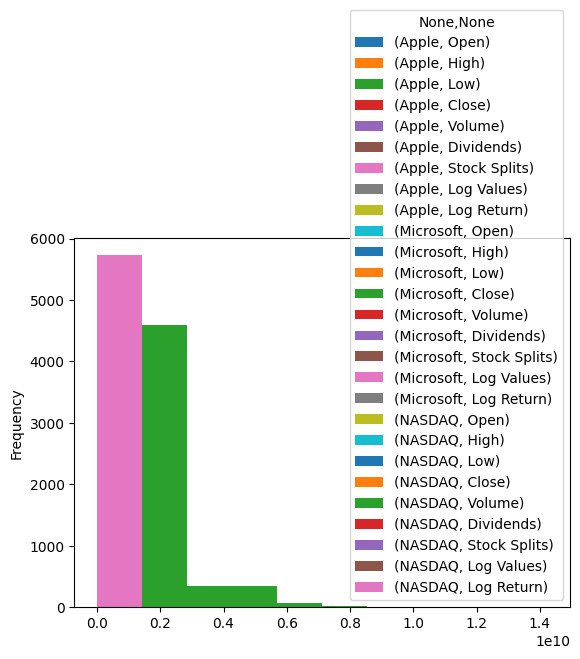

In [84]:
stock_history.plot.hist(bins = 10)